In [9]:
!pip install yfinance --quiet

     |████████████████████████████████| 6.4 MB 29.8 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [1]:
!pip install pandas-datareader --quiet

In [2]:
!pip install plotly==5.9.0 --quiet

     |████████████████████████████████| 15.2 MB 15.7 MB/s 


In [10]:
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
from sklearn.preprocessing import Normalizer
from collections import OrderedDict

In [52]:
companies_dict = OrderedDict({
    'Amazon':'AMZN',
    'Apple':'AAPL',
    'Walgreen':'WBA',
    'Northrop Grumman':'NOC',
    'Boeing':'BA',
    'Lockheed Martin':'LMT',
    'McDonalds':'MCD',
    'Intel':'INTC',
    'IBM':'IBM',
    'Texas Instruments':'TXN',
    'MasterCard':'MA',
    'Microsoft':'MSFT',
    'General Electrics':'GE',
    'American Express':'AXP',
    'Pepsi':'PEP',
    'Coca Cola':'KO',
    'Johnson & Johnson':'JNJ',
    'Toyota':'TM',
    'Honda':'HMC',
    'Sony':'SONY',
    'Exxon':'XOM',
    'Chevron':'CVX',
    'Valero Energy':'VLO',
    'Ford':'F',
    'Bank of America':'BAC'})

In [75]:
data_source = 'yahoo' # Source of data is yahoo finance.
start_date = '2015-01-01' 
end_date = '2017-12-31'
#df = data.DataReader(list(companies_dict.values()),data_source,start_date,end_date)
df = yf.download(list(companies_dict.values()),start_date,end_date)

[*********************100%***********************]  25 of 25 completed


In [76]:
df.head()

Adj Close                                                        \
                 AAPL     AMZN        AXP          BA        BAC        CVX   
Date                                                                          
2015-01-02  24.678251  15.4260  82.801117  113.657211  15.558110  80.985275   
2015-01-05  23.983021  15.1095  80.611343  112.870056  15.106143  77.748161   
2015-01-06  23.985285  14.7645  78.893372  111.540649  14.654181  77.712196   
2015-01-07  24.321608  14.9210  80.616394  113.272385  14.723710  77.647453   
2015-01-08  25.256094  15.0230  81.759171  115.275269  15.027922  79.424263   

                                                          ...   Volume  \
                    F          GE        HMC         IBM  ...      MCD   
Date                                                      ...            
2015-01-02  11.052872  167.553223  29.590000  112.178085  ...  6019700   
2015-01-05  10.621124  164.477661  28.980000  110.412949  ...  6211900   
2015-01-06  10.520378  160.934006  28.820000  108.031799  ...  6484100   
2015-01-07  10.822604  161.000885  29.110001  107.325775  ...  6400300   
2015-01-08  11.096049  162.939804  29.480000  109.658478  ...  5476700   

                                                                           \
                MSFT      NOC      PEP     SONY      TM      TXN      VLO   
Date                                                                        
2015-01-02  27913900  2042000  3545700  1229900  250000  4020100  5897000   
2015-01-05  39673900  5765000  6441000  1083100  240600  5599300  7732700   
2015-01-06  36447900  3121100  6195000  2209100  285600  5468400  8586800   
2015-01-07  29114100  2369900  6526300  2486300  385700  4577100  8825800   
2015-01-08  29645200  3466300  7131600  1296500  498800  6295200  8941700   

                               
                WBA       XOM  
Date                           
2015-01-02  3938500  10220400  
2015-01-05  4767900  18502400  
2015-01-06  4881600  16670700  
2015-01-07  5672100  13590700  
2015-01-08  4083900  15487500  

[5 rows x 150 columns]

In [77]:
stock_open = np.array(df['Open']).T
stock_close = np.array(df['Close']).T

In [78]:
stock_close.shape

(25, 755)

In [79]:
movements  = stock_close - stock_open

In [80]:
movements.shape

(25, 755)

In [81]:
sum_of_movement = np.sum(movements,1)

In [82]:
for i in range(len(companies_dict)):
  print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))



company:AAPL, Change:4.172473907470703
company:AMZN, Change:-4.1365861892700195
company:AXP, Change:7.210105895996094
company:BA, Change:102.7198486328125
company:BAC, Change:-3.4800024032592773
company:CVX, Change:26.569992065429688
company:F, Change:-5.549996376037598
company:GE, Change:37.231048583984375
company:HMC, Change:-8.060001373291016
company:IBM, Change:14.952239990234375
company:INTC, Change:19.86003303527832
company:JNJ, Change:31.659950256347656
company:KO, Change:12.15997314453125
company:LMT, Change:60.23992919921875
company:MA, Change:24.589866638183594
company:MCD, Change:51.34001922607422
company:MSFT, Change:28.760025024414062
company:NOC, Change:75.39007568359375
company:PEP, Change:38.079978942871094
company:SONY, Change:-0.25998878479003906
company:TM, Change:-17.310104370117188
company:TXN, Change:29.139911651611328
company:VLO, Change:29.45999526977539
company:WBA, Change:-5.6500701904296875
company:XOM, Change:9.899986267089844


## VISUALIZATION OF DATA

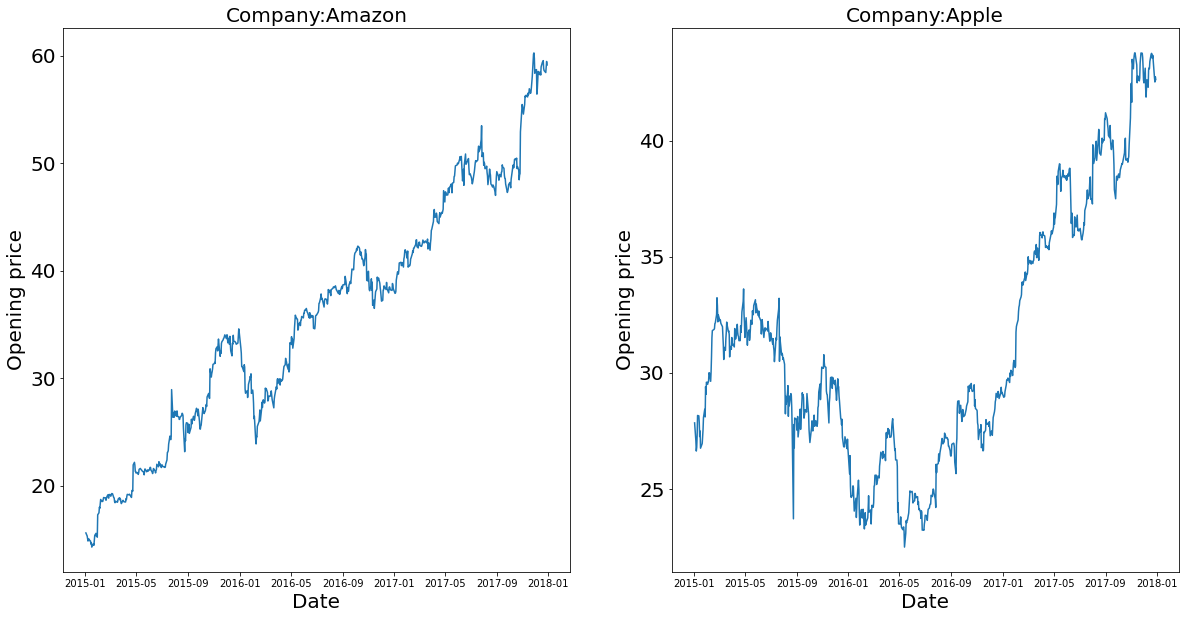

In [83]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.subplot(1,2,1) # Subplot 1
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Opening price',fontsize = 20)
plt.plot(df['Open']['AMZN'])
plt.subplot(1,2,2) # Subplot 2
plt.title('Company:Apple',fontsize = 20) 
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Opening price',fontsize = 20)
plt.plot(df['Open']['AAPL'])

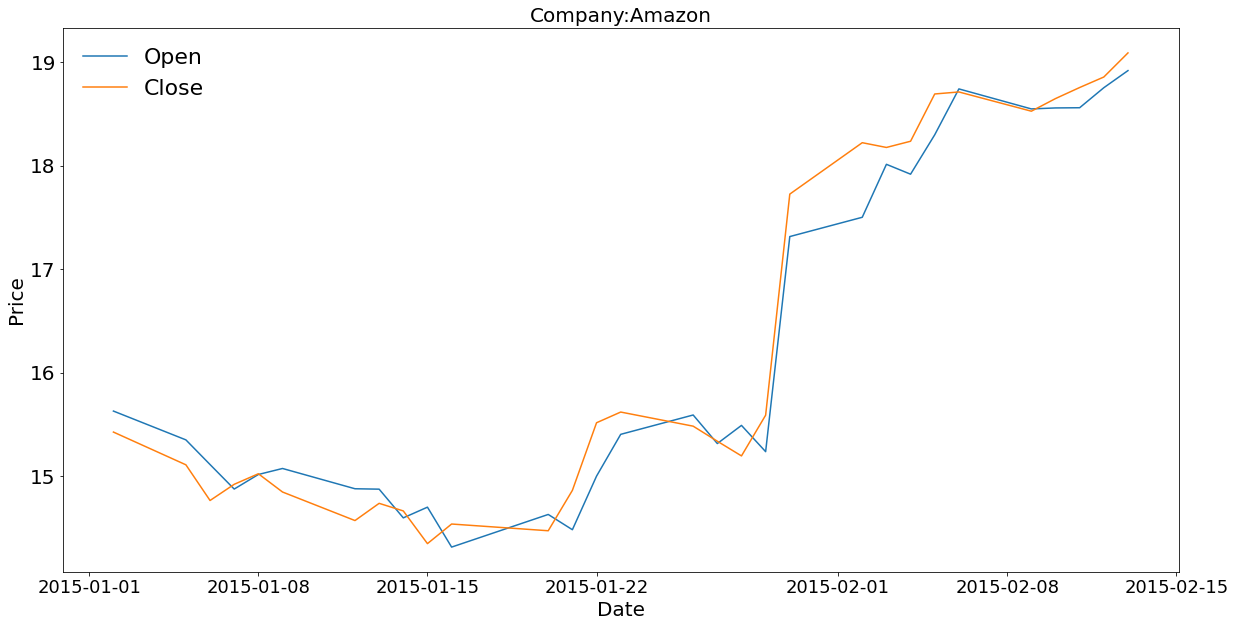

In [84]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Price',fontsize = 20)
plt.plot(df.iloc[0:30]['Open']['AMZN'],label = 'Open') # Opening prices of first 30 days are plotted against date
plt.plot(df.iloc[0:30]['Close']['AMZN'],label = 'Close') # Closing prices of first 30 days are plotted against date
plt.legend(loc='upper left', frameon=False,framealpha=1,prop={'size': 22}) # Properties of legend box

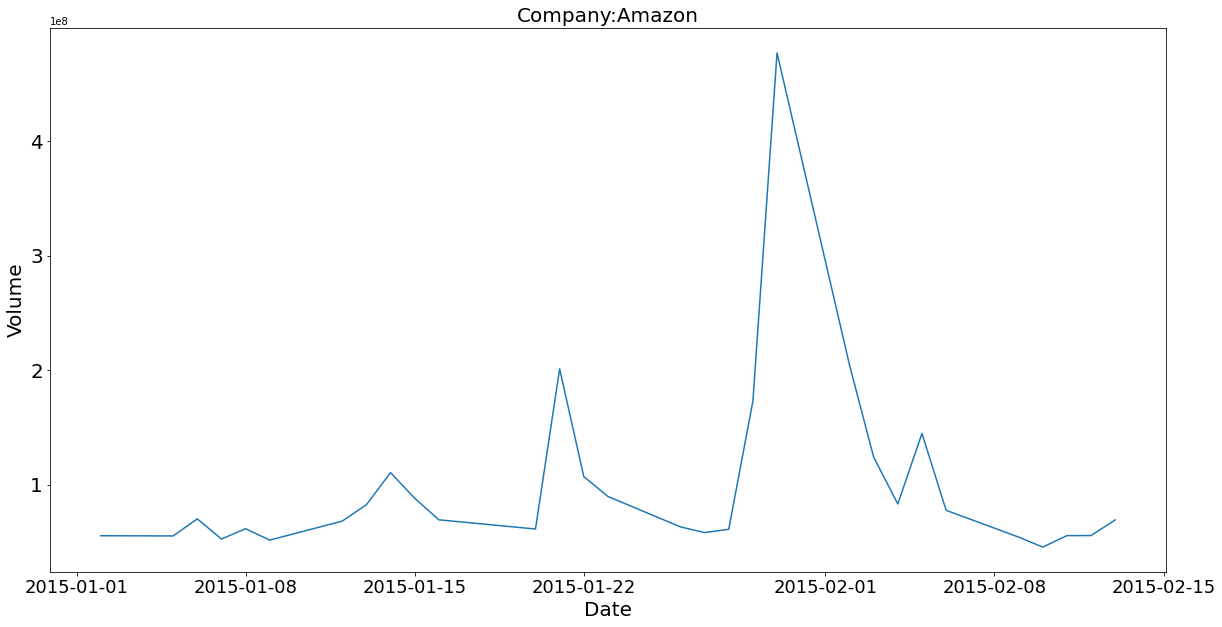

In [85]:
plt.figure(figsize = (20,10)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df.iloc[0:30]['Volume']['AMZN'],label = 'Open') 

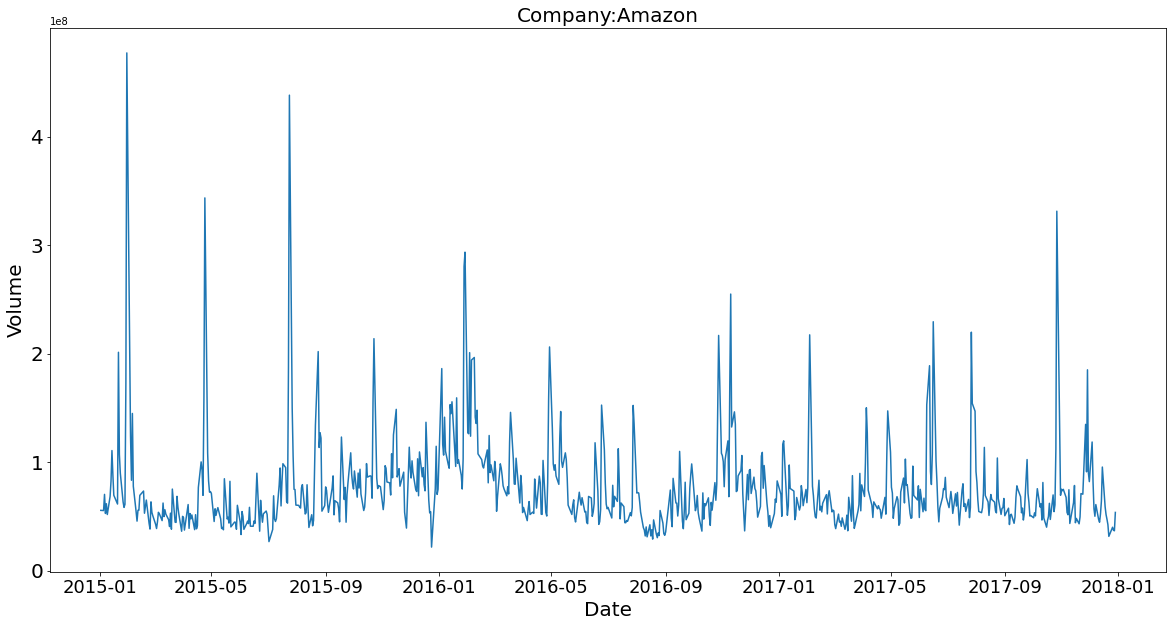

In [86]:
plt.figure(figsize = (20,10)) # Adjusting figure size
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Volume',fontsize = 20)
plt.plot(df['Volume']['AMZN'],label = 'Open') # Volume prices of first 30 days are plotted against date

In [87]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime



fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open']['AMZN'],
                high=df['High']['AMZN'],
                low=df['Low']['AMZN'],
                close=df['Close']['AMZN'])])

fig.show()

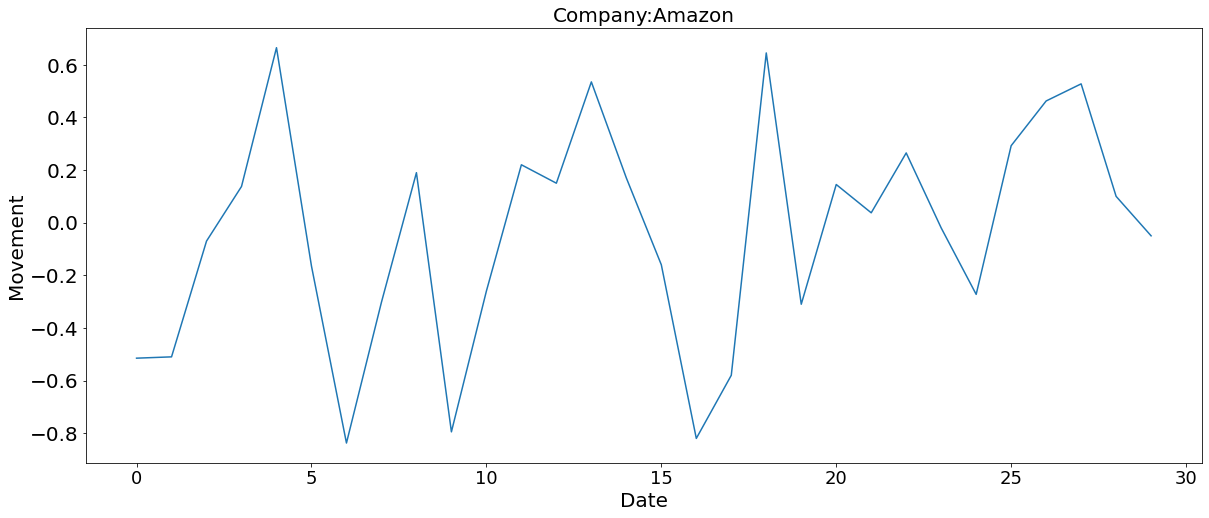

In [88]:
plt.figure(figsize = (20,8)) 
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0][0:30]) 

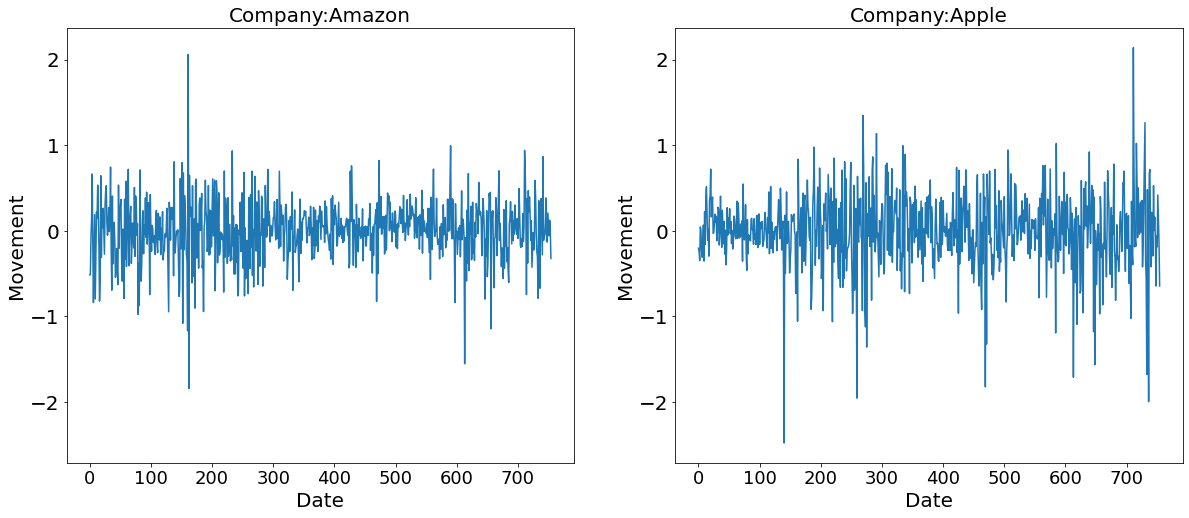

In [89]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Movement',fontsize = 20)
plt.plot(movements[1]) 

In [90]:
movements

array([[-0.51499939, -0.51000023, -0.06999969, ...,  0.125     ,
         0.02000046, -0.32250214],
       [-0.20300007, -0.24100018, -0.3475008 , ...,  0.11750031,
        -0.14500046, -0.64400101],
       [-0.15000153, -1.90000153, -2.16000366, ...,  0.22999573,
         0.05999756, -0.69000244],
       ...,
       [ 0.79000092, -1.56999969, -0.54000092, ...,  0.31999969,
        -0.08999634, -0.77999878],
       [-0.11000061, -0.58000183, -1.27999878, ..., -0.47000122,
         0.06000519, -0.00999451],
       [ 0.58000183, -1.80999756, -0.43000031, ..., -0.08999634,
         0.03999329, -0.36000061]])

In [91]:
a = Normalizer()
norm_movements = a.fit_transform(movements)

In [92]:
print(norm_movements.min())
print(norm_movements.max())
print(norm_movements.mean())

-0.25991072682969973
0.2604577827945872
0.0009148220687537604


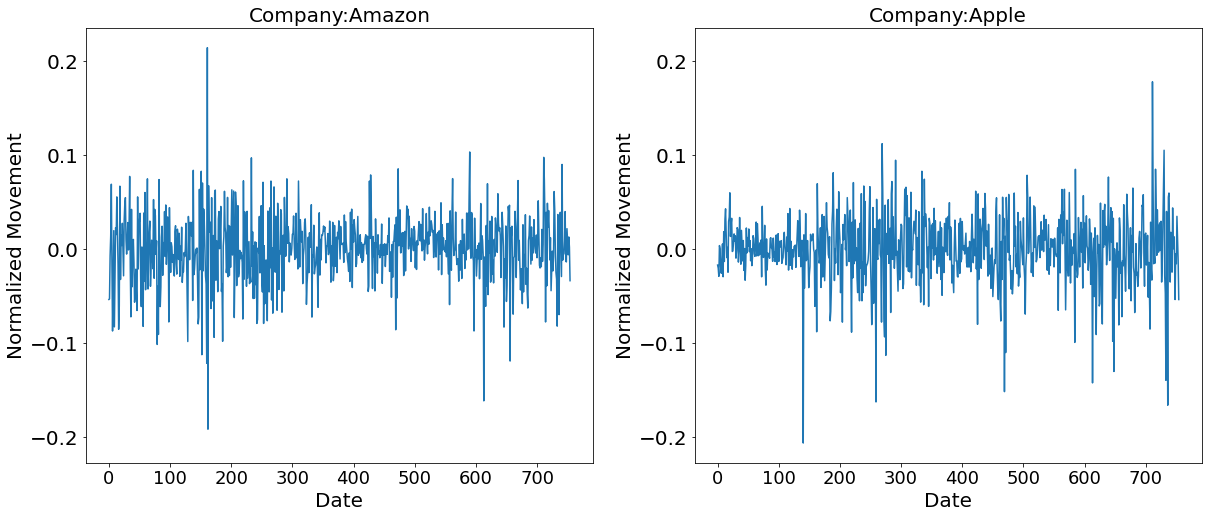

In [93]:
plt.figure(figsize = (20,8)) 
ax1 = plt.subplot(1,2,1)
plt.title('Company:Amazon',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Normalized Movement',fontsize = 20)
plt.plot(norm_movements[0]) 
plt.subplot(1,2,2,sharey = ax1)
plt.title('Company:Apple',fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 20)
plt.xlabel('Date',fontsize = 20)
plt.ylabel('Normalized Movement',fontsize = 20)
plt.plot(norm_movements[1])

In [94]:
# Import the necessary packages
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

# Define a normalizer
normalizer = Normalizer()

# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)

# Make a pipeline chaining normalizer and kmeans
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(movements)

labels = pipeline.predict(movements)

In [95]:
labels

array([6, 0, 8, 2, 8, 4, 1, 1, 1, 6, 6, 7, 3, 2, 0, 7, 0, 2, 3, 1, 1, 6,
       9, 5, 4], dtype=int32)

In [96]:
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)


In [97]:
df1

,labels,companies
1,0,Apple
16,0,Johnson & Johnson
14,0,Pepsi
20,1,Exxon
19,1,Sony
6,1,McDonalds
7,1,Intel
8,1,IBM
3,2,Northrop Grumman
17,2,Toyota


In [98]:
kmeans.inertia_

7.355375955222469

##PCA

In [99]:
from sklearn.decomposition import PCA

# Define a normalizer
normalizer = Normalizer()

# Reduce the data
reduced_data = PCA(n_components = 2)

# Create Kmeans model
kmeans = KMeans(n_clusters = 10,max_iter = 1000)

# Make a pipeline chaining normalizer, pca and kmeans
pipeline = make_pipeline(normalizer,reduced_data,kmeans)

# Fit pipeline to daily stock movements
pipeline.fit(movements)

# Prediction
labels = pipeline.predict(movements)

# Create dataframe to store companies and predicted labels
df2 = pd.DataFrame({'labels':labels,'companies':list(companies_dict.keys())}).sort_values(by=['labels'],axis = 0)



In [100]:
df2

,labels,companies
12,0,General Electrics
18,0,Honda
17,0,Toyota
13,0,American Express
4,1,Boeing
6,1,McDonalds
1,2,Apple
16,2,Johnson & Johnson
14,2,Pepsi
24,3,Bank of America


<Figure size 432x288 with 0 Axes>

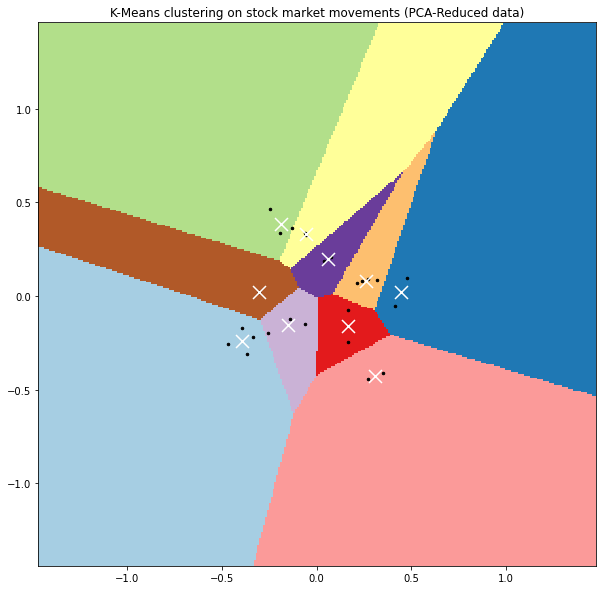

In [101]:
# Reduce the data
reduced_data = PCA(n_components = 2).fit_transform(norm_movements)

# Define step size of mesh
h = 0.01

# Plot the decision boundary
x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

# Obtain labels for each point in the mesh using our trained model
Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define color plot
cmap = plt.cm.Paired

# Plotting figure
plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')


plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)

# Plot the centroid of each cluster as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)

plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()
